In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from scipy.stats import iqr

def correct_format_columns (df):
    #Delete ' ', replace ',' for '_'
    df.columns = df.columns.str.replace(' ', '')
    df.columns = df.columns.str.replace(',', '_')
            
def replace_incorrect_value(df, list_columns, min_value, max_value):
    for column in list_columns:
        df[column] = df[column].apply(lambda x: None if x>max_value or x<min_value else x)
        
def percent_nan (df):
    #Calculations percent nan
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))
                
def replace_nan_outlier(df):
    #Replace nan or outlier for median/top
    for column in df.columns:
        if df[column].dtypes != "object": 
            median_value=df[column].median()
            df[column]=df[column].fillna(median_value)
            outlier = outliers(df[column])
            df[column] = df[column].replace(outlier, median_value)
        else:
            top = df[column].describe()['top']
            df[column] = df[column].fillna(top)
               
def outliers(df, factor=1.5):
    #Find outliers
    minimum = np.quantile(df, 0.25) - factor * iqr(df)
    maximum = np.quantile(df, 0.75) + factor * iqr(df)
    outliers = df[(df < minimum) | (df > maximum)]
    return outliers        
    
def visualization(df, target_column):
    #Show histogram/boxplot
    for column in df:
        print(column)
        print(df[column].unique())
        print(df[column].value_counts())
        
        plt.subplot(1, 2, 1)
        df[column].hist()
        
        plt.subplot(1, 2, 2)
        if df[column].dtypes != "object": 
            sns.boxplot(x=column, data=df)
        else:
            sns.boxplot(x=column, y=target_column, data=df)
            
        plt.tight_layout()
        plt.show()
                     
def significant_differences(df, target_column):
    #Test Student with Bonferroni
    for column in df:
        if df[column].dtypes == "object": 
            cols = df.loc[:, column].value_counts().index[:10]
            combinations_all = list(combinations(cols, 2))
            for comb in combinations_all:
                if ttest_ind(df.loc[stud_math.loc[:, column] == comb[0], target_column], 
                        df.loc[df.loc[:, column] == comb[1], target_column]).pvalue <= 0.05/len(combinations_all):
                    print('Найдены статистически значимые различия для колонки', column)
                    break

def identical_values_85_perc(df):
    #Finf columns with 85 percent identical values
    num_rows = len(df.index)
    low_information_cols = [] 

    for col in df.columns:
        cnts = df[col].value_counts(dropna=False)
        top_pct = (cnts/num_rows).iloc[0]
    
        if top_pct > 0.85:
            low_information_cols.append(col)
            print('{0}: {1:.5f}%'.format(col, top_pct*100))
            print(cnts)
            print()
                    
pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_columns', 50)

stud_math = pd.read_csv('stud_math.csv') 

display(stud_math.head(10))
stud_math.info()                   

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [85]:
correct_format_columns(stud_math)
replace_incorrect_value(stud_math, ['famrel','freetime','goout','health'], 1, 5)
replace_incorrect_value(stud_math, ['traveltime','studytime'], 1, 4)
replace_incorrect_value(stud_math, ['Medu','Fedu'], 0, 4)

In [86]:
percent_nan(stud_math)

school - 0.0%
sex - 0.0%
age - 0.0%
address - 4.0%
famsize - 7.0%
Pstatus - 11.0%
Medu - 1.0%
Fedu - 6.0%
Mjob - 5.0%
Fjob - 9.0%
reason - 4.0%
guardian - 8.0%
traveltime - 7.0%
studytime - 2.0%
failures - 6.0%
schoolsup - 2.0%
famsup - 10.0%
paid - 10.0%
activities - 4.0%
nursery - 4.0%
studytime_granular - 2.0%
higher - 5.0%
internet - 9.0%
romantic - 8.0%
famrel - 7.0%
freetime - 3.0%
goout - 2.0%
health - 4.0%
absences - 3.0%
score - 2.0%


school
['GP' 'MS']
GP    349
MS     46
Name: school, dtype: int64


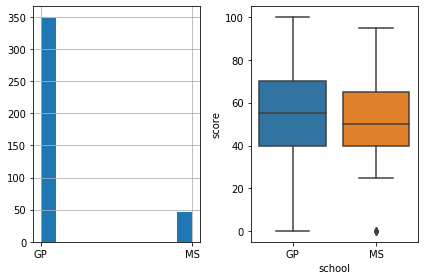

sex
['F' 'M']
F    208
M    187
Name: sex, dtype: int64


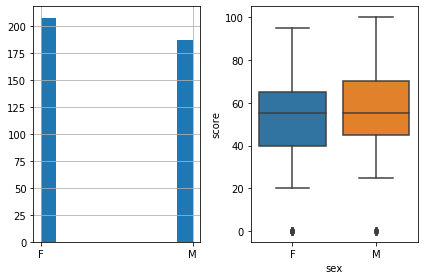

age
[18 17 15 16 19 22 20 21]
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64


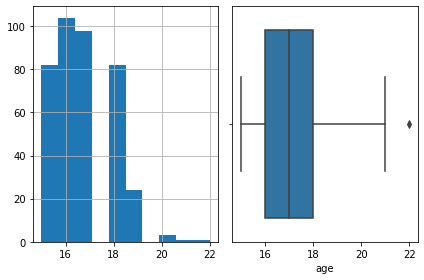

address
['U' nan 'R']
U    295
R     83
Name: address, dtype: int64


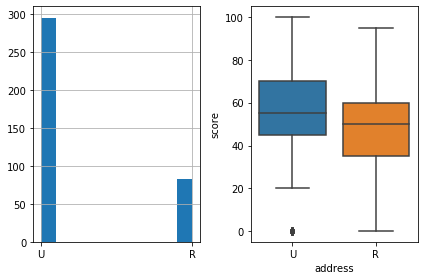

famsize
[nan 'GT3' 'LE3']
GT3    261
LE3    107
Name: famsize, dtype: int64


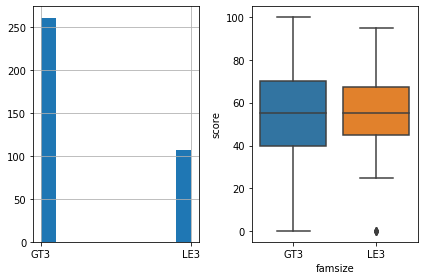

Pstatus
['A' nan 'T']
T    314
A     36
Name: Pstatus, dtype: int64


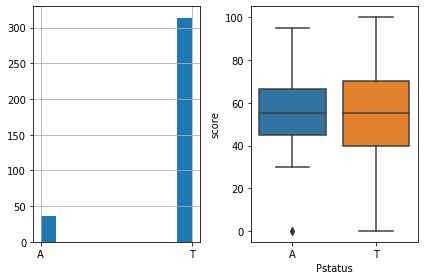

Medu
[ 4.  1.  3.  2. nan  0.]
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64


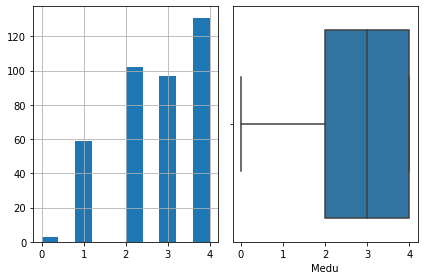

Fedu
[ 4.  1.  2.  3. nan  0.]
2.0    106
3.0     96
4.0     88
1.0     78
0.0      2
Name: Fedu, dtype: int64


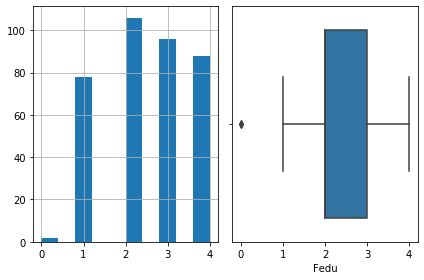

Mjob
['at_home' 'health' 'other' 'services' 'teacher' nan]
other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64


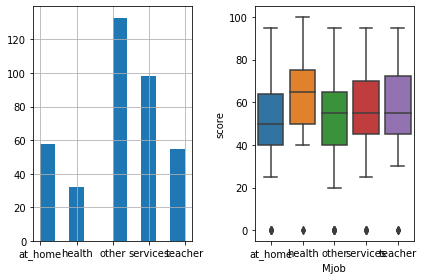

Fjob
['teacher' 'other' nan 'health' 'services' 'at_home']
other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64


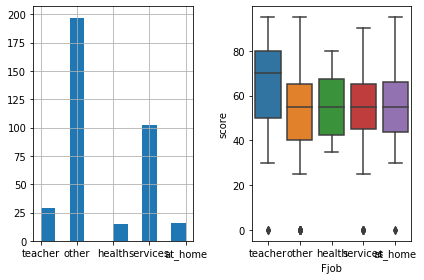

reason
['course' 'other' 'home' 'reputation' nan]
course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64


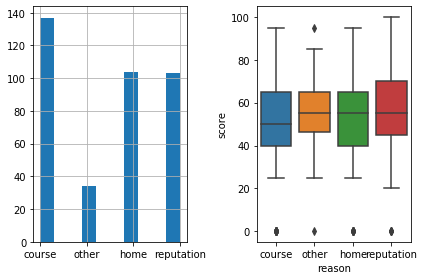

guardian
['mother' 'father' 'other' nan]
mother    250
father     86
other      28
Name: guardian, dtype: int64


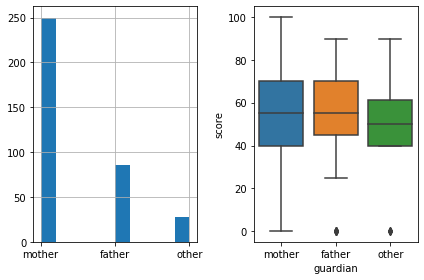

traveltime
[ 2.  1.  3. nan  4.]
1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64


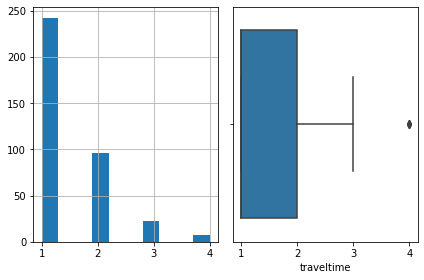

studytime
[ 2.  3.  1. nan  4.]
2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64


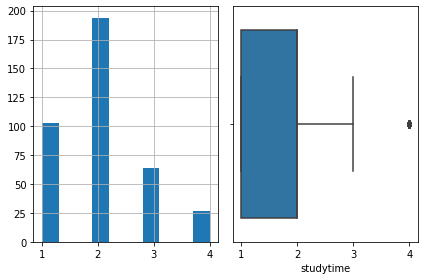

failures
[ 0.  3. nan  2.  1.]
0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64


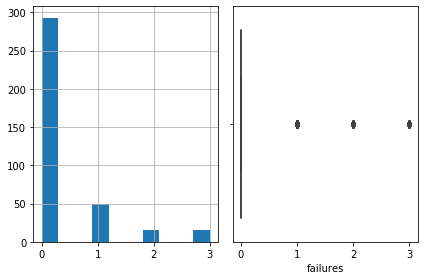

schoolsup
['yes' 'no' nan]
no     335
yes     51
Name: schoolsup, dtype: int64


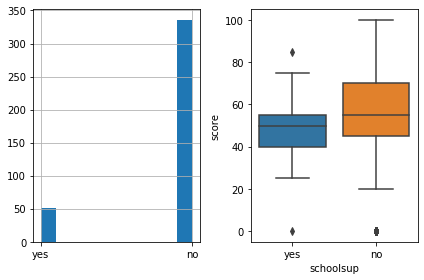

famsup
['no' 'yes' nan]
yes    219
no     137
Name: famsup, dtype: int64


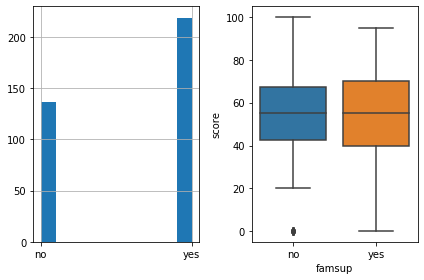

paid
['no' nan 'yes']
no     200
yes    155
Name: paid, dtype: int64


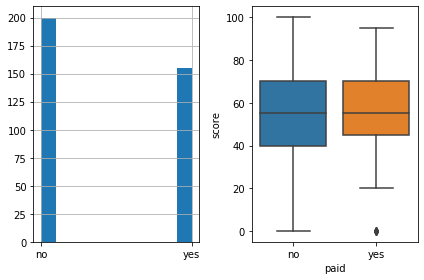

activities
['no' 'yes' nan]
yes    195
no     186
Name: activities, dtype: int64


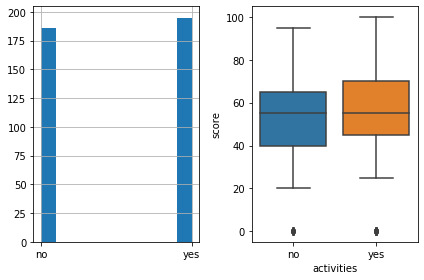

nursery
['yes' 'no' nan]
yes    300
no      79
Name: nursery, dtype: int64


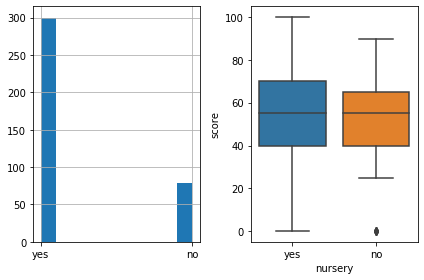

studytime_granular
[ -6.  -9.  -3.  nan -12.]
-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime_granular, dtype: int64


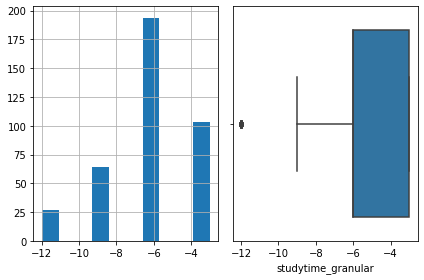

higher
['yes' nan 'no']
yes    356
no      19
Name: higher, dtype: int64


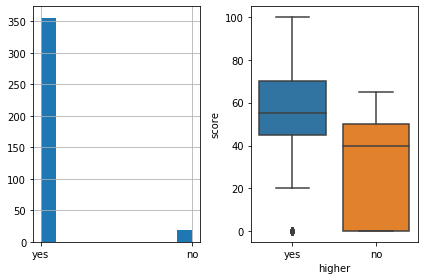

internet
[nan 'yes' 'no']
yes    305
no      56
Name: internet, dtype: int64


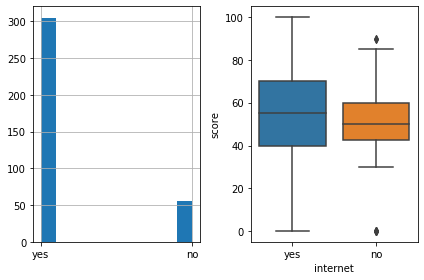

romantic
['no' nan 'yes']
no     240
yes    124
Name: romantic, dtype: int64


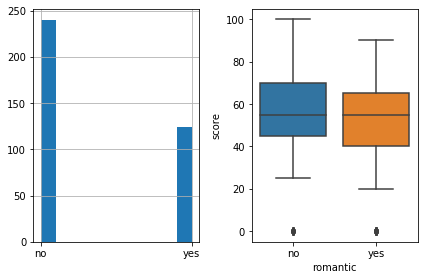

famrel
[ 4.  5.  3. nan  2.  1.]
4.0    182
5.0     99
3.0     62
2.0     17
1.0      7
Name: famrel, dtype: int64


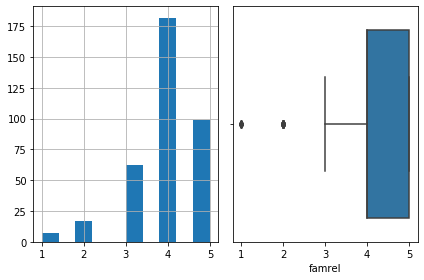

freetime
[ 3.  2.  4.  1.  5. nan]
3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64


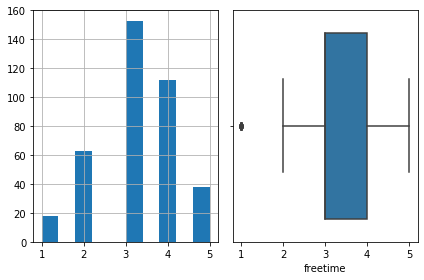

goout
[ 4.  3.  2.  1.  5. nan]
3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64


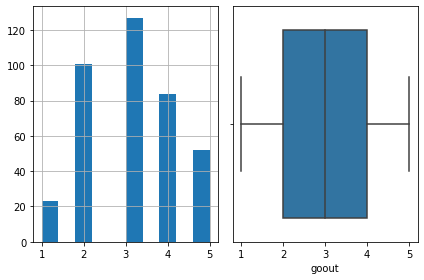

health
[ 3.  5.  1.  2.  4. nan]
5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64


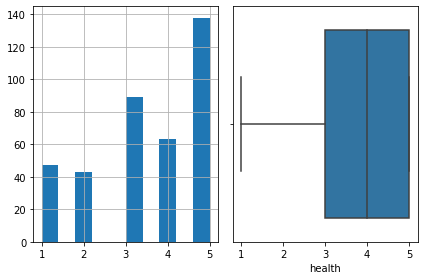

absences
[  6.   4.  10.   2.   0.  16.  nan  14.   7.   8.  25.  12.  54.  18.
  26.  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.
  30.  19.   9.  11.  38.  40.  23.  17. 212.]
0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64


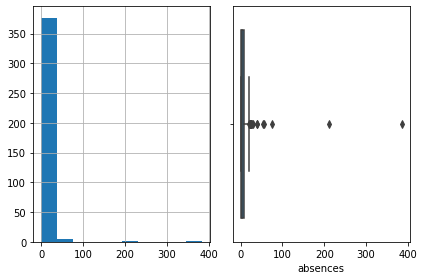

score
[ 30.  50.  75.  55.  95.  45.  60.  70.  80.  25.  40.  85.  90.  65.
 100.  35.   0.  nan  20.]
50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64


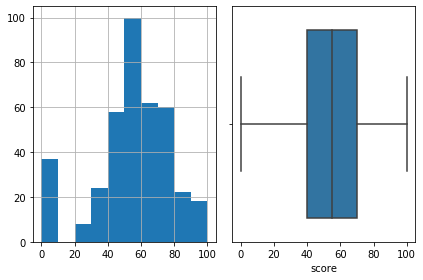

In [87]:
visualization(stud_math, 'score')

In [88]:
replace_nan_outlier(stud_math)

In [89]:
percent_nan(stud_math)

school - 0.0%
sex - 0.0%
age - 0.0%
address - 0.0%
famsize - 0.0%
Pstatus - 0.0%
Medu - 0.0%
Fedu - 0.0%
Mjob - 0.0%
Fjob - 0.0%
reason - 0.0%
guardian - 0.0%
traveltime - 0.0%
studytime - 0.0%
failures - 0.0%
schoolsup - 0.0%
famsup - 0.0%
paid - 0.0%
activities - 0.0%
nursery - 0.0%
studytime_granular - 0.0%
higher - 0.0%
internet - 0.0%
romantic - 0.0%
famrel - 0.0%
freetime - 0.0%
goout - 0.0%
health - 0.0%
absences - 0.0%
score - 0.0%


school
['GP' 'MS']
GP    349
MS     46
Name: school, dtype: int64


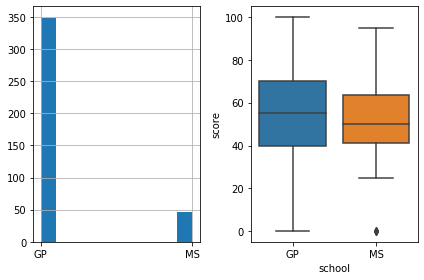

sex
['F' 'M']
F    208
M    187
Name: sex, dtype: int64


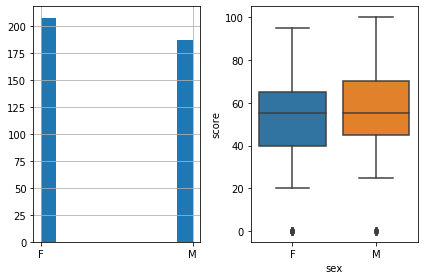

age
[18 17 15 16 19 20 21]
16    104
17     99
18     82
15     82
19     24
20      3
21      1
Name: age, dtype: int64


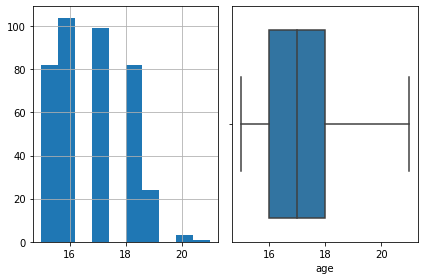

address
['U' 'R']
U    312
R     83
Name: address, dtype: int64


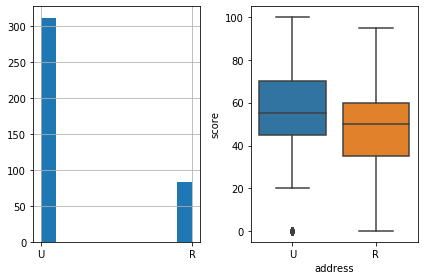

famsize
['GT3' 'LE3']
GT3    288
LE3    107
Name: famsize, dtype: int64


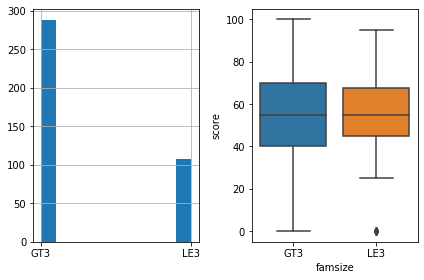

Pstatus
['A' 'T']
T    359
A     36
Name: Pstatus, dtype: int64


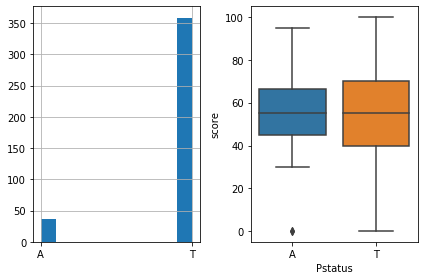

Medu
[4. 1. 3. 2. 0.]
4.0    131
2.0    102
3.0    100
1.0     59
0.0      3
Name: Medu, dtype: int64


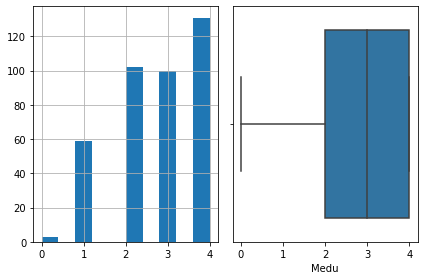

Fedu
[4. 1. 2. 3.]
2.0    133
3.0     96
4.0     88
1.0     78
Name: Fedu, dtype: int64


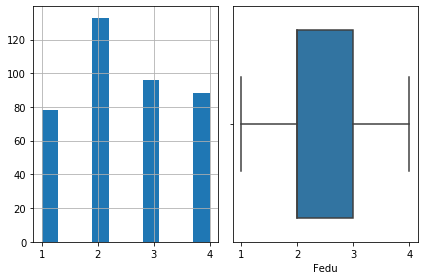

Mjob
['at_home' 'health' 'other' 'services' 'teacher']
other       152
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64


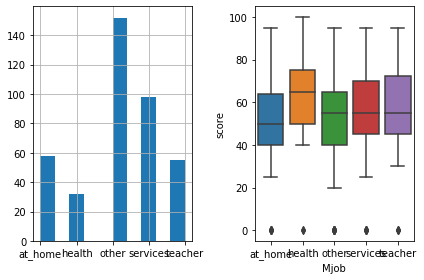

Fjob
['teacher' 'other' 'health' 'services' 'at_home']
other       233
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64


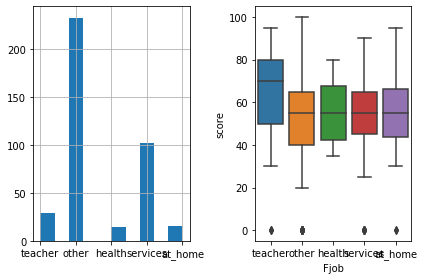

reason
['course' 'other' 'home' 'reputation']
course        154
home          104
reputation    103
other          34
Name: reason, dtype: int64


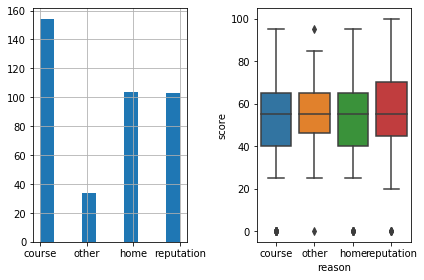

guardian
['mother' 'father' 'other']
mother    281
father     86
other      28
Name: guardian, dtype: int64


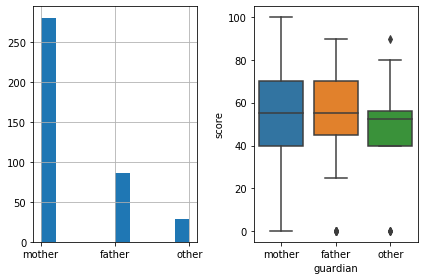

traveltime
[2. 1. 3.]
1.0    277
2.0     96
3.0     22
Name: traveltime, dtype: int64


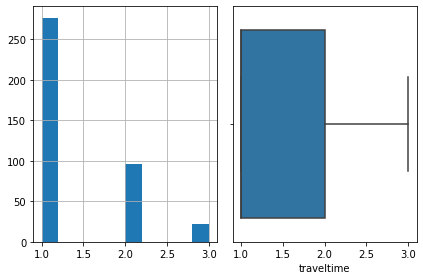

studytime
[2. 3. 1.]
2.0    228
1.0    103
3.0     64
Name: studytime, dtype: int64


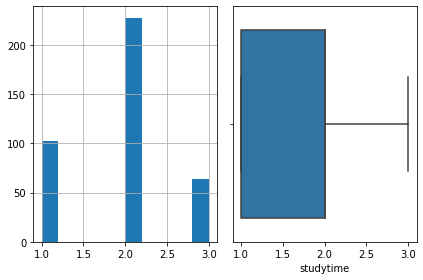

failures
[0.]
0.0    395
Name: failures, dtype: int64


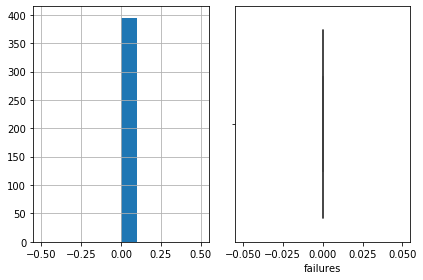

schoolsup
['yes' 'no']
no     344
yes     51
Name: schoolsup, dtype: int64


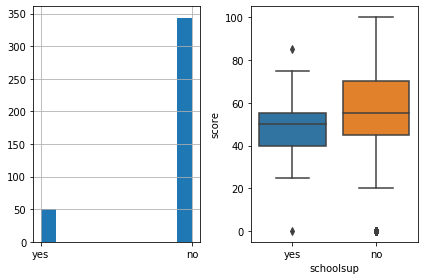

famsup
['no' 'yes']
yes    258
no     137
Name: famsup, dtype: int64


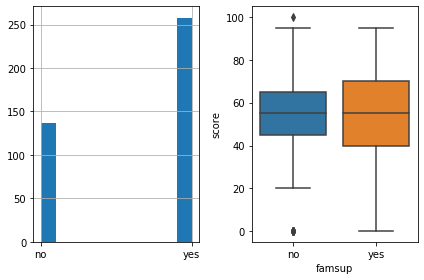

paid
['no' 'yes']
no     240
yes    155
Name: paid, dtype: int64


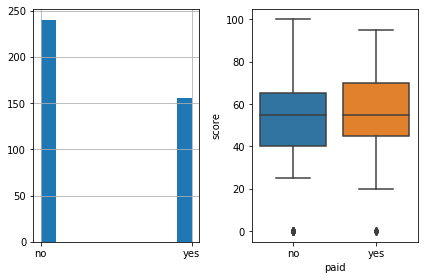

activities
['no' 'yes']
yes    209
no     186
Name: activities, dtype: int64


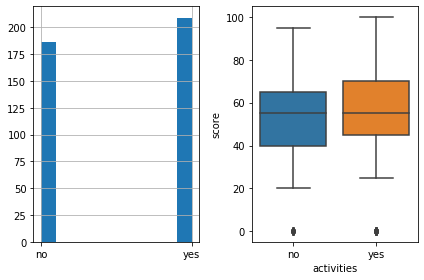

nursery
['yes' 'no']
yes    316
no      79
Name: nursery, dtype: int64


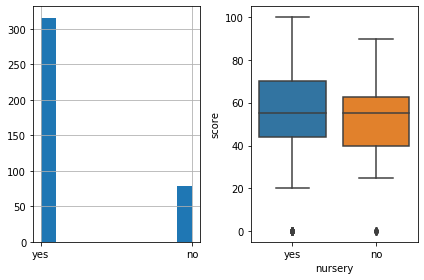

studytime_granular
[-6. -9. -3.]
-6.0    228
-3.0    103
-9.0     64
Name: studytime_granular, dtype: int64


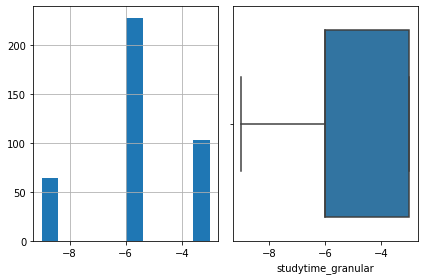

higher
['yes' 'no']
yes    376
no      19
Name: higher, dtype: int64


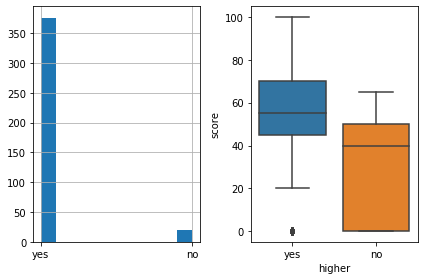

internet
['yes' 'no']
yes    339
no      56
Name: internet, dtype: int64


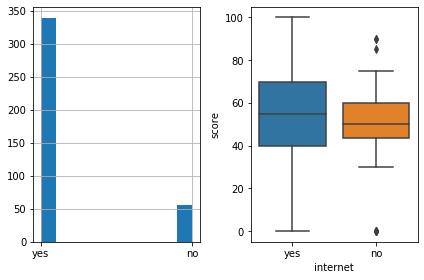

romantic
['no' 'yes']
no     271
yes    124
Name: romantic, dtype: int64


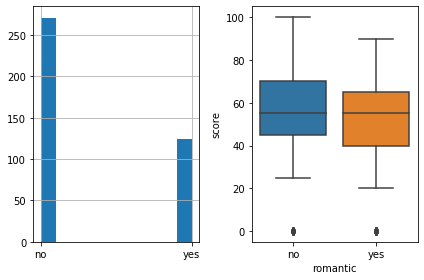

famrel
[4. 5.]
4.0    296
5.0     99
Name: famrel, dtype: int64


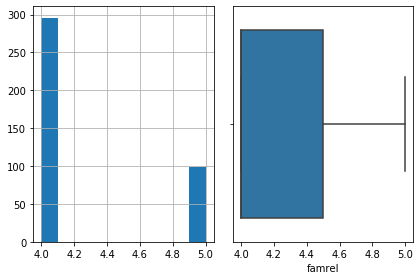

freetime
[3. 2. 4. 5.]
3.0    182
4.0    112
2.0     63
5.0     38
Name: freetime, dtype: int64


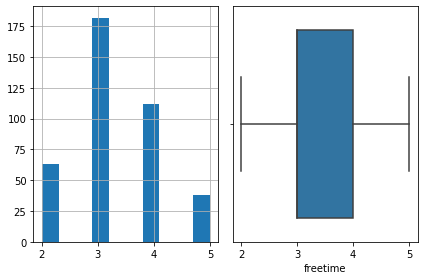

goout
[4. 3. 2. 1. 5.]
3.0    135
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64


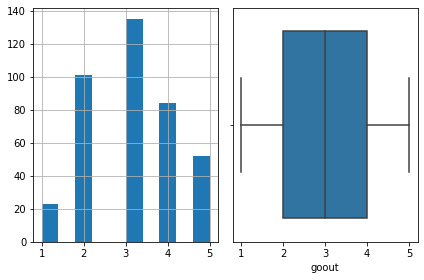

health
[3. 5. 1. 2. 4.]
5.0    138
3.0     89
4.0     78
1.0     47
2.0     43
Name: health, dtype: int64


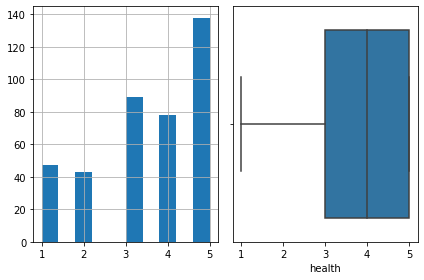

absences
[ 6.  4. 10.  2.  0. 16. 14.  7.  8. 12. 18. 20.  5. 13. 15.  3.  1. 19.
  9. 11. 17.]
0.0     111
4.0      82
2.0      60
6.0      31
8.0      21
10.0     17
12.0     12
14.0     12
3.0       8
16.0      7
7.0       6
18.0      5
5.0       5
20.0      4
1.0       3
9.0       3
11.0      2
13.0      2
15.0      2
19.0      1
17.0      1
Name: absences, dtype: int64


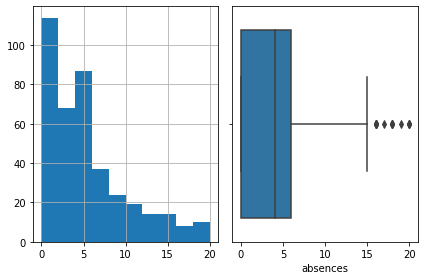

score
[ 30.  50.  75.  55.  95.  45.  60.  70.  80.  25.  40.  85.  90.  65.
 100.  35.   0.  20.]
50.0     54
55.0     52
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64


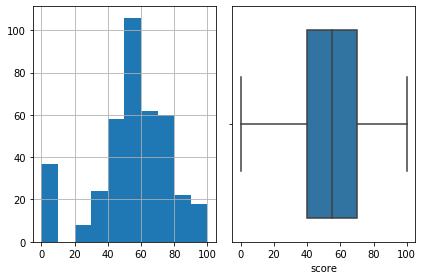

In [90]:
visualization(stud_math, 'score')

In [91]:
#Not all outliers replace, enter replace_nan_outlier again
replace_nan_outlier(stud_math)

school
['GP' 'MS']
GP    349
MS     46
Name: school, dtype: int64


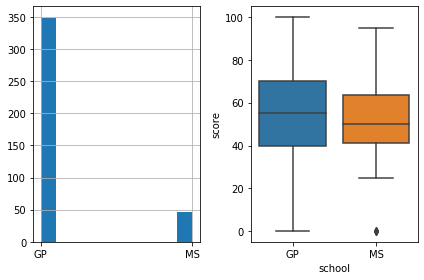

sex
['F' 'M']
F    208
M    187
Name: sex, dtype: int64


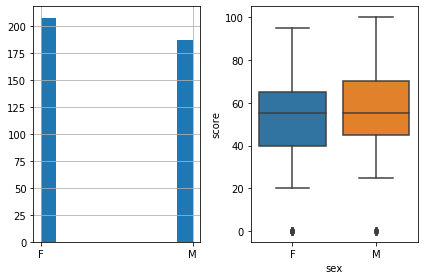

age
[18 17 15 16 19 20 21]
16    104
17     99
18     82
15     82
19     24
20      3
21      1
Name: age, dtype: int64


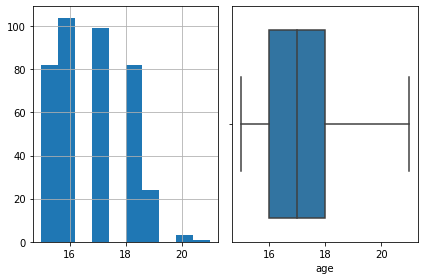

address
['U' 'R']
U    312
R     83
Name: address, dtype: int64


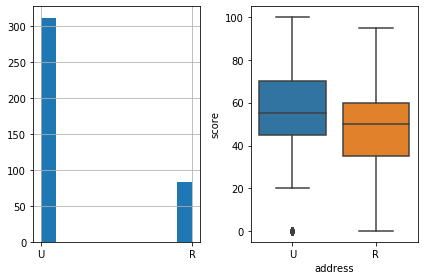

famsize
['GT3' 'LE3']
GT3    288
LE3    107
Name: famsize, dtype: int64


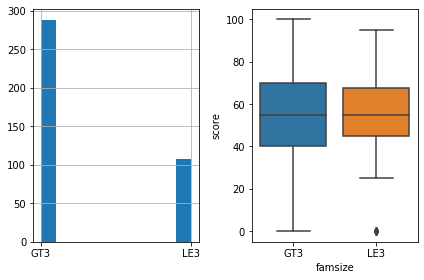

Pstatus
['A' 'T']
T    359
A     36
Name: Pstatus, dtype: int64


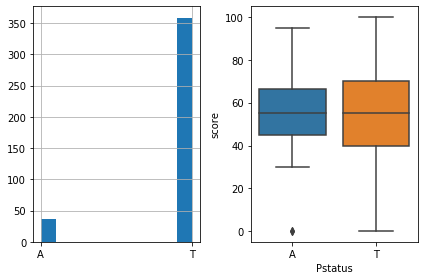

Medu
[4. 1. 3. 2. 0.]
4.0    131
2.0    102
3.0    100
1.0     59
0.0      3
Name: Medu, dtype: int64


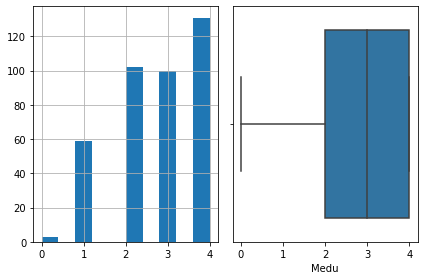

Fedu
[4. 1. 2. 3.]
2.0    133
3.0     96
4.0     88
1.0     78
Name: Fedu, dtype: int64


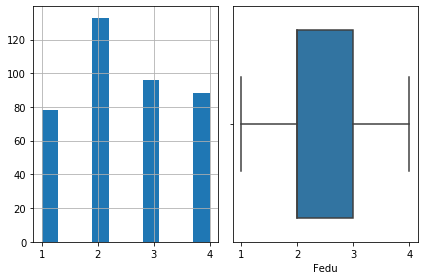

Mjob
['at_home' 'health' 'other' 'services' 'teacher']
other       152
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64


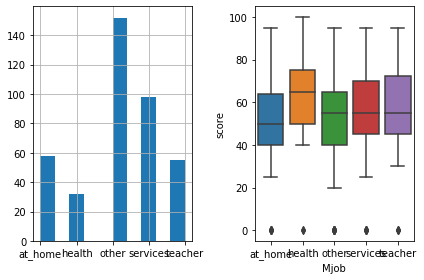

Fjob
['teacher' 'other' 'health' 'services' 'at_home']
other       233
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64


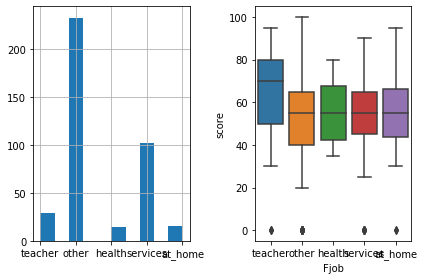

reason
['course' 'other' 'home' 'reputation']
course        154
home          104
reputation    103
other          34
Name: reason, dtype: int64


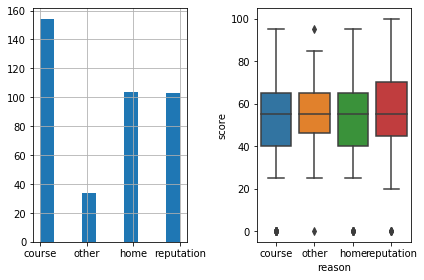

guardian
['mother' 'father' 'other']
mother    281
father     86
other      28
Name: guardian, dtype: int64


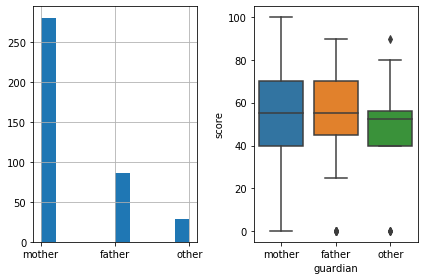

traveltime
[2. 1. 3.]
1.0    277
2.0     96
3.0     22
Name: traveltime, dtype: int64


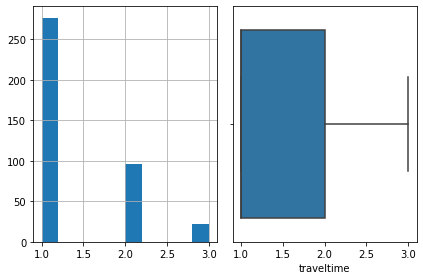

studytime
[2. 3. 1.]
2.0    228
1.0    103
3.0     64
Name: studytime, dtype: int64


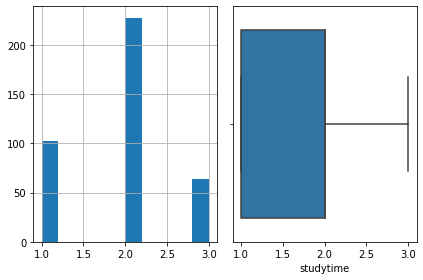

failures
[0.]
0.0    395
Name: failures, dtype: int64


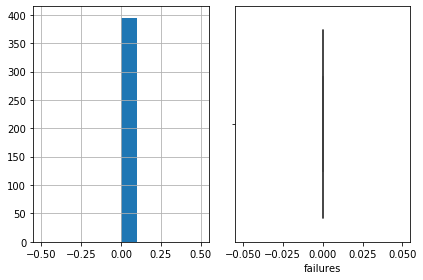

schoolsup
['yes' 'no']
no     344
yes     51
Name: schoolsup, dtype: int64


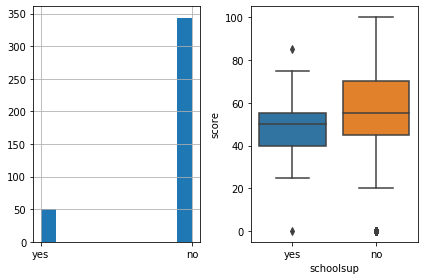

famsup
['no' 'yes']
yes    258
no     137
Name: famsup, dtype: int64


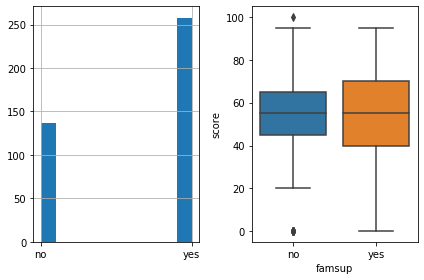

paid
['no' 'yes']
no     240
yes    155
Name: paid, dtype: int64


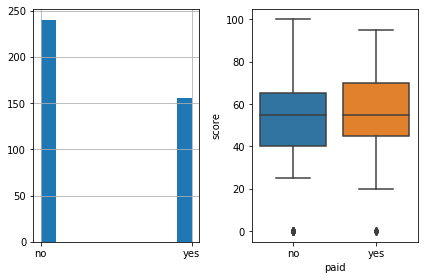

activities
['no' 'yes']
yes    209
no     186
Name: activities, dtype: int64


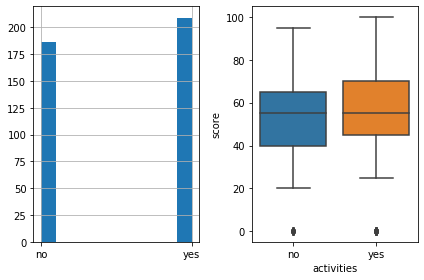

nursery
['yes' 'no']
yes    316
no      79
Name: nursery, dtype: int64


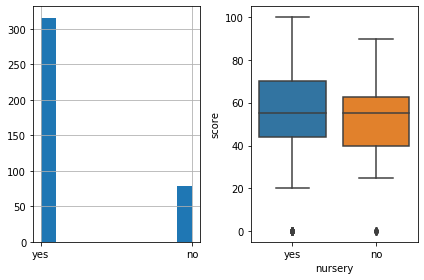

studytime_granular
[-6. -9. -3.]
-6.0    228
-3.0    103
-9.0     64
Name: studytime_granular, dtype: int64


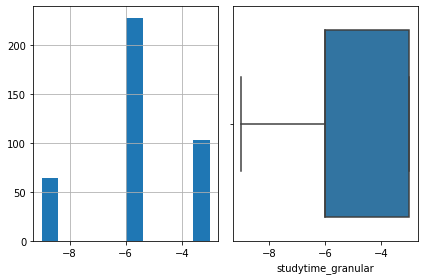

higher
['yes' 'no']
yes    376
no      19
Name: higher, dtype: int64


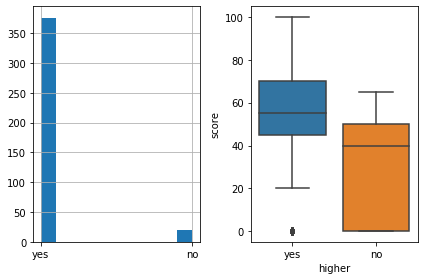

internet
['yes' 'no']
yes    339
no      56
Name: internet, dtype: int64


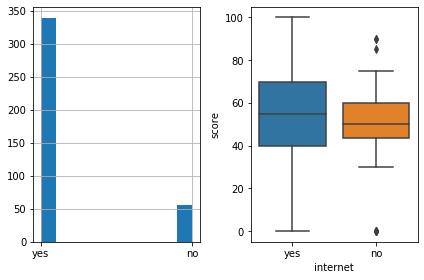

romantic
['no' 'yes']
no     271
yes    124
Name: romantic, dtype: int64


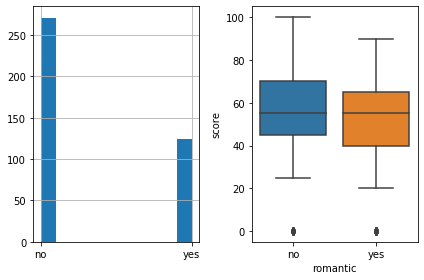

famrel
[4. 5.]
4.0    296
5.0     99
Name: famrel, dtype: int64


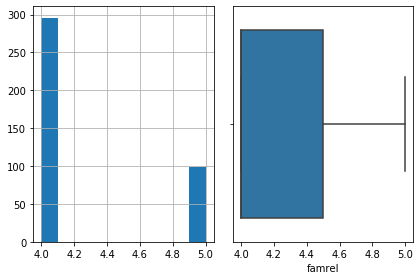

freetime
[3. 2. 4. 5.]
3.0    182
4.0    112
2.0     63
5.0     38
Name: freetime, dtype: int64


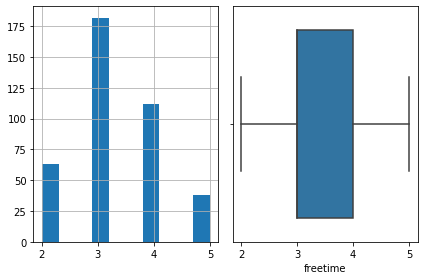

goout
[4. 3. 2. 1. 5.]
3.0    135
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64


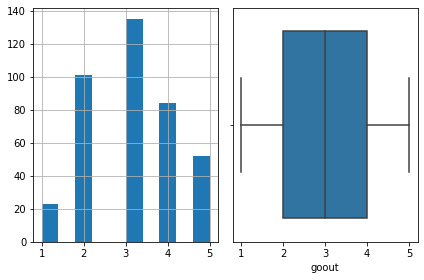

health
[3. 5. 1. 2. 4.]
5.0    138
3.0     89
4.0     78
1.0     47
2.0     43
Name: health, dtype: int64


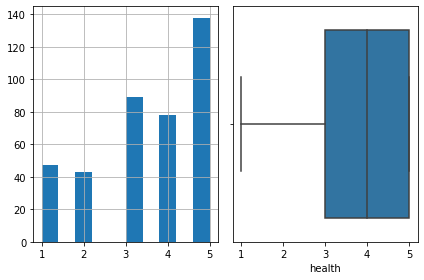

absences
[ 6.  4. 10.  2.  0. 14.  7.  8. 12.  5. 13. 15.  3.  1.  9. 11.]
0.0     111
4.0     100
2.0      60
6.0      31
8.0      21
10.0     17
12.0     12
14.0     12
3.0       8
7.0       6
5.0       5
9.0       3
1.0       3
11.0      2
15.0      2
13.0      2
Name: absences, dtype: int64


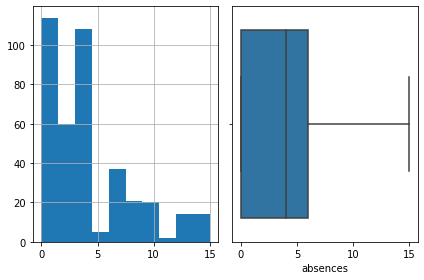

score
[ 30.  50.  75.  55.  95.  45.  60.  70.  80.  25.  40.  85.  90.  65.
 100.  35.   0.  20.]
50.0     54
55.0     52
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64


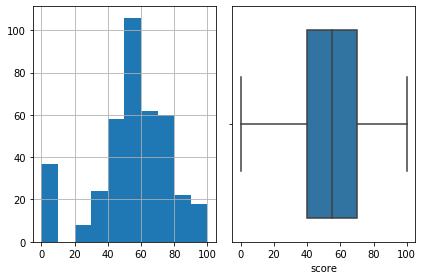

In [92]:
visualization(stud_math, 'score')

In [93]:
stud_math.describe(include=['object'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,312,288,359,152,233,154,281,344,258,240,209,316,376,339,271


In [94]:
stud_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.0,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.683544,2.751899,2.491139,1.354430,1.901266,0.0,-5.703797,4.250633,3.316456,3.103797,3.549367,3.936709,52.303797
std,1.247783,1.094154,1.045560,0.584008,0.643494,0.0,1.930482,0.433927,0.854137,1.104610,1.372118,3.812023,22.746314
min,15.000000,0.000000,1.000000,1.000000,1.000000,0.0,-9.000000,4.000000,2.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.0,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.0,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.0,-3.000000,4.500000,4.000000,4.000000,5.000000,6.000000,70.000000
max,21.000000,4.000000,4.000000,3.000000,3.000000,0.0,-3.000000,5.000000,5.000000,5.000000,5.000000,15.000000,100.000000


In [95]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.167336,-0.149035,0.115995,0.062139,NaN,-0.062139,0.015605,0.025141,0.119646,-0.046443,0.103564,-0.149072
Medu,-0.167336,1.000000,0.603748,-0.112271,0.087683,NaN,-0.087683,0.035079,0.016329,0.063361,-0.050991,0.097847,0.205568
Fedu,-0.149035,0.603748,1.000000,-0.065506,0.072257,NaN,-0.072257,-0.020267,-0.035219,0.039256,-0.006329,0.003361,0.128390
traveltime,0.115995,-0.112271,-0.065506,1.000000,-0.116009,NaN,0.116009,-0.050964,-0.062603,-0.025698,-0.063066,-0.053742,-0.054936
studytime,0.062139,0.087683,0.072257,-0.116009,1.000000,NaN,-1.000000,0.025221,-0.086159,-0.046247,-0.044770,-0.025317,0.110949
failures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studytime_granular,-0.062139,-0.087683,-0.072257,0.116009,-1.000000,NaN,1.000000,-0.025221,0.086159,0.046247,0.044770,0.025317,-0.110949
famrel,0.015605,0.035079,-0.020267,-0.050964,0.025221,NaN,-0.025221,1.000000,0.073073,0.046195,-0.005914,-0.025677,0.066066
freetime,0.025141,0.016329,-0.035219,-0.062603,-0.086159,NaN,0.086159,0.073073,1.000000,0.261007,0.057019,0.020978,0.002224
goout,0.119646,0.063361,0.039256,-0.025698,-0.046247,NaN,0.046247,0.046195,0.261007,1.000000,-0.014274,0.110060,-0.125708


In [96]:
stud_math.drop(['studytime_granular'], axis='columns', inplace=True)

In [97]:
identical_values_85_perc(stud_math)

school: 88.35443%
GP    349
MS     46
Name: school, dtype: int64

Pstatus: 90.88608%
T    359
A     36
Name: Pstatus, dtype: int64

failures: 100.00000%
0.0    395
Name: failures, dtype: int64

schoolsup: 87.08861%
no     344
yes     51
Name: schoolsup, dtype: int64

higher: 95.18987%
yes    376
no      19
Name: higher, dtype: int64

internet: 85.82278%
yes    339
no      56
Name: internet, dtype: int64



In [98]:
stud_math.drop(['failures','higher'], axis='columns', inplace=True)

In [99]:
significant_differences(stud_math, 'score')

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки romantic


In [ ]:
'''
Цели и задачи проекта:
- провести EDA данных

Этапы работы над проектом:
- выявить некорректные данные, заменить их
- выявить nan, заменить их
- выявить выбросы, заменить их
- отобрать признаки, которые влияют на успеваемость для дальнейшего построения модели

1. В данных мало пустых значений, максимальный % пустых значений в столбце 11%. Пустые значения заменены на медиану/моду.
2. В столбцах famrel, freetime, goout, health, traveltime, studytime, Medu, Fedu присутствуют некорректные данные, 
которые заменены на медиану. Номинативные признаки заполнены корректно.
3. Выбросы найдены только в столбце absences, которые заменены на медиану.
4. Переменные studytime и studytime_granular скоррелированы, studytime_granular исключен.
5. Из представленных признаков наибольшую корреляцию с успеваемостью имеют Medu, age, Fedu, goout, 
наименьшую - freetime, traveltime, famrel, health.
6. Для столбцов failures, higher, school, Pstatus, schoolsup, internet свыше 85% значений одинаковы, столбцы исключены.
7. Cтатистически значимые различия найдены для address, Mjob, romantic.

Параметры, предлагаемые для дальнейшего исследования:
1. age
2. address
3. Medu
4. Fedu
5. Mjob
6. Fjob
7. studytime
8. romantic
9. goout
10. absences

Не использовать:
1. school (свыше 85% значений одинаковы)
2. sex (успеваемость мальчик и девочек практически не отличается)
3. famsize (согласно показателям boxplot и histogram признак не влияет на успеваемость)
4. Pstatus (согласно показателям boxplot и histogram признак не влияет на успеваемость, 85% значений одинаковы)
5. reason (согласно показателям boxplot и histogram признак не влияет на успеваемость)
6. guardian (согласно показателям boxplot и histogram признак не влияет на успеваемость)
7. traveltime (корреляция одна из самых слабых)
8. failures (свыше 85% значений одинаковы)
9. schoolsup (свыше 85% значений одинаковы)
10. famsup (согласно показателям boxplot и histogram, признак не влияет на успеваемость, 85% значений одинаковы)
11. paid (согласно показателям boxplot и histogram, признак не влияет на успеваемость)
12. activities (согласно показателям boxplot и histogram признак не влияет на успеваемость)
13. nursery (согласно показателям boxplot и histogram признак не влияет на успеваемость)
14. studytime_granular (коррелирует с studytime)
15. higher (свыше 85% значений одинаковы)
16. internet (свыше 85% значений одинаковы)
17. famrel (корреляция одна из самых слабых)
18. freetime (корреляция одна из самых слабых)
19. health (корреляция одна из самых слабых)